<a href="https://colab.research.google.com/github/PRAMODVENKATESH/Deep-Learning-model-for-plasticity-distribution-in-ductile-materials/blob/main/CNN_for_TRF_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import clear_output 
clear_output()

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from sklearn.model_selection import train_test_split
from natsort import natsorted
import pickle
from PIL import Image
import pandas as pd
import numpy as np
from numpy import asarray
import argparse
import locale
import glob
import cv2
import os

In [ ]:
def Total_reaction_force_data(inputPath1):
# initialize the list of column names in the CSV file and then
# load it using Pandas
    cols = ["Totalreactionforce"]
    df = pd.read_csv(inputPath1, sep=",", header=None, names=cols)
    print(df.shape)
    #print(df.head(3))
    print(df.describe)
	  #return the data frame
    return df

In [ ]:
def Plasticity_distribution(df,inputPath2):
# initialize our images array (i.e., the analysis files themselves)
    #outputImage = np.zeros((500, 500, 1), dtype="uint8")
    images = []
    #for filename in natsorted(glob.glob('G:\Plasticdeformation-dataset\Plasticitydistribution Dataset\*.png')):
    filelist = natsorted(glob.glob('/content/drive/MyDrive/Grey and resized/*.png'))
    #image_array = np.array([np.array(Image.open(fname)) for fname in filelist])
    for fname in filelist:
        img = Image.open(fname)
        #imgGray = img.convert('L')
        outputImage = np.array(img)
        images.append(outputImage)
        print(fname)
        #img= Image.open(filename)
        #images.append(img)
    #return our set of images
    return np.array(images)

In [ ]:
# construct the path to the input .txt file that contains information
# on each house in the dataset and then load the dataset
print("[INFO] Total_reaction_force_data...")
inputPath1 = ('/content/drive/MyDrive/TRF_2531.txt')
df = Total_reaction_force_data(inputPath1)

# load the house images and then scale the pixel intensities to the
# range [0, 1]
print("[INFO] Plasticity_distribution...")
inputPath2 =('/content/drive/MyDrive/Grey and resized')
images = Plasticity_distribution(df,inputPath2 )
print(images.shape)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
split = train_test_split(df, images, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

[INFO] Total_reaction_force_data...
(2531, 1)
<bound method NDFrame.describe of       Totalreactionforce
0                 0.0000
1                40.7709
2                50.4301
3                63.2452
4                66.0471
...                  ...
2526             19.2059
2527             18.5576
2528             17.7749
2529             17.1335
2530             16.6805

[2531 rows x 1 columns]>
[INFO] Plasticity_distribution...
/content/drive/MyDrive/Grey and resized/Frame1.png
/content/drive/MyDrive/Grey and resized/Frame2.png
/content/drive/MyDrive/Grey and resized/Frame3.png
/content/drive/MyDrive/Grey and resized/Frame4.png
/content/drive/MyDrive/Grey and resized/Frame5.png
/content/drive/MyDrive/Grey and resized/Frame6.png
/content/drive/MyDrive/Grey and resized/Frame7.png
/content/drive/MyDrive/Grey and resized/Frame8.png
/content/drive/MyDrive/Grey and resized/Frame9.png
/content/drive/MyDrive/Grey and resized/Frame10.png
/content/drive/MyDrive/Grey and resized/Frame11.p

In [ ]:
# find the largest Reaction force in the training set and use it to
# scale our TRF to the range [0, 1] (will lead to better training and convergence)
#maxTotalreactionforce = trainAttrX["Totalreactionforce"].max()
trainY = trainAttrX["Totalreactionforce"] #/ maxTotalreactionforce
testY = testAttrX["Totalreactionforce"] #/ maxTotalreactionforce
df2 = pd.DataFrame(testY)
pd.set_option('display.max_rows', None, 'display.max_columns', None)
df2.sort_index(axis = 0)
# print(df2)

# arr_test = testY.to_numpy()
# with np.printoptions(threshold = np.inf):
#   print(arr_test)





,Totalreactionforce
18,75.14650
25,70.88050
29,65.45810
43,52.23840
44,51.73830
48,50.75610
49,50.57980
51,50.38770
56,48.20300
67,44.32730


In [ ]:
#Example using a DenseNet121
#Backbbone or Feature Extractor

model = Sequential()
#weights1 = '/content/drive/MyDrive/CNN Weights/Weights_rev1'(To be used if weights are used)
model = tf.keras.applications.DenseNet121(input_shape=[128,128,1], input_tensor=None, weights=None, classes=1, include_top=False)
#Next, let's add some layers to create our Regresor
#First flatten the output from DenseNet121

y = model.output
y = tf.keras.layers.Flatten()(y)

#Now you add one or more hiden layers (and select the number of nodes for each)

y = tf.keras.layers.Dense(50, activation='relu', name='hidden_layer1')(y)

y = tf.keras.layers.Dense(8, activation='relu', name='hidden_layer2')(y)

#Add the output node (or nodes depending on how many outputs correspond to each input) and use a linear activation function
y = tf.keras.layers.Dense(1, activation='linear', name='output_layer')(y)

# Now you put both parts (input and output) together in a single model called new_model
new_model = tf.keras.Model(inputs=model.input, outputs=y) 


# Now compile the new_model specifying the remaining hyperparameters e.g. optimizer, learning rate, loss
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
new_model.compile(optimizer=opt, loss="mse")

#Visualize the final architecture of your model

#print(new_model.summary())

In [ ]:
#simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 , patience = 30)
# train the model
print("[INFO] training model...")
history = new_model.fit(x=trainImagesX, y=trainY, 
    validation_data=(testImagesX, testY),
    epochs=200, batch_size=55, callbacks=[es])

[INFO] training model...
Epoch 1/200
35/35 [==============================] - 69s 642ms/step - loss: 277.9734 - val_loss: 1048.1555
Epoch 2/200
35/35 [==============================] - 18s 508ms/step - loss: 8.4520 - val_loss: 1046.3711
Epoch 3/200
35/35 [==============================] - 18s 507ms/step - loss: 5.3965 - val_loss: 917.9084
Epoch 4/200
35/35 [==============================] - 18s 507ms/step - loss: 3.0025 - val_loss: 752.7156
Epoch 5/200
35/35 [==============================] - 19s 536ms/step - loss: 1.8224 - val_loss: 605.9952
Epoch 6/200
35/35 [==============================] - 18s 506ms/step - loss: 1.7559 - val_loss: 478.9857
Epoch 7/200
35/35 [==============================] - 18s 507ms/step - loss: 1.6721 - val_loss: 325.6456
Epoch 8/200
35/35 [==============================] - 18s 506ms/step - loss: 2.1791 - val_loss: 283.7305
Epoch 9/200
35/35 [==============================] - 18s 507ms/step - loss: 1.2194 - val_loss: 149.2057
Epoch 10/200
35/35 [===============

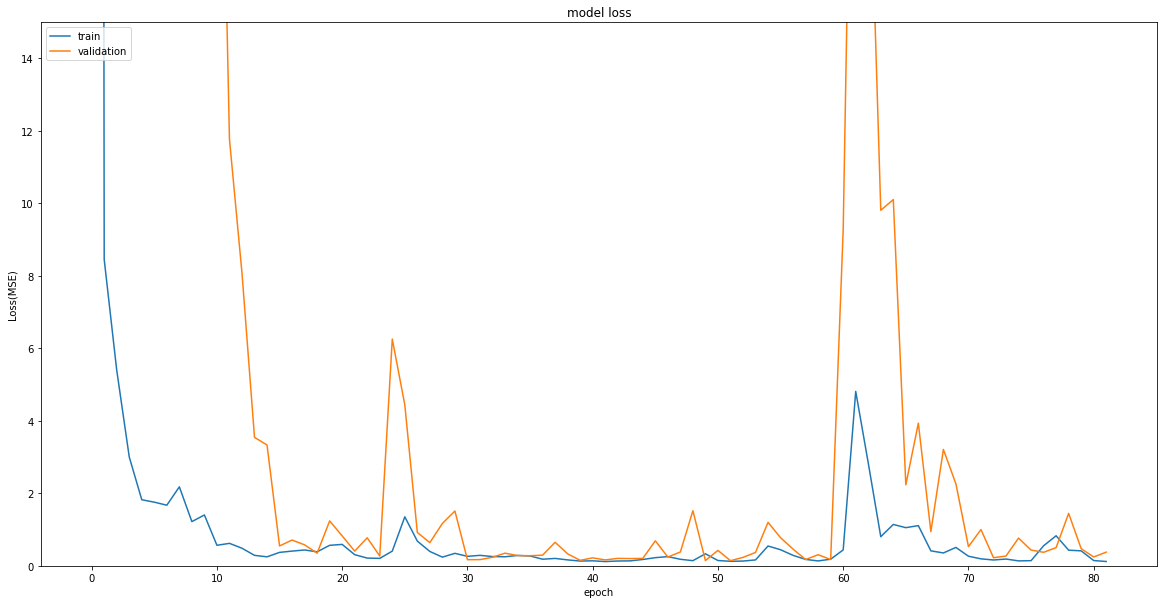

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
plt.rcParams["figure.figsize"] = (20,10)
#plt.plot(range(0, 10))
#Initial axes limits are 0, 10
# scale_factor = 0.5
# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()
# plt.xlim(xmin * scale_factor, xmax * scale_factor)
# plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss(MSE)')
plt.ylim(0, 15)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
images_dir = '/content/drive/MyDrive'
plt.savefig(f"{images_dir}/yaay nodes.png")
plt.show()



In [ ]:
# make predictions on the testing data
print("[INFO] Totalreactionforce...")
preds = new_model.predict(testImagesX)
preds2 = new_model.predict(trainImagesX)
# compute the difference between the *predicted* force and the
# *actual* force, then compute the percentage difference and
# the absolute percentage difference
#prediction = pd.Series(preds).to_csv('prediced_data.csv')
print(preds)
# pd.set_option('display.max_rows', None, 'display.max_columns', None)
# prediction.sort_index(axis = 0)
#print(prediction)
#print(diff)



[INFO] Totalreactionforce...
[[30.328817  ]
 [30.828657  ]
 [51.88642   ]
 [27.751965  ]
 [28.891573  ]
 [55.68774   ]
 [35.91725   ]
 [37.755272  ]
 [16.846289  ]
 [35.041843  ]
 [37.274887  ]
 [22.783865  ]
 [21.389112  ]
 [72.76763   ]
 [36.60169   ]
 [31.406063  ]
 [40.75065   ]
 [50.35135   ]
 [21.798767  ]
 [25.026491  ]
 [42.34181   ]
 [21.986887  ]
 [33.789703  ]
 [13.166848  ]
 [27.449394  ]
 [21.264925  ]
 [21.368261  ]
 [32.235683  ]
 [29.39351   ]
 [16.617407  ]
 [38.351727  ]
 [33.716984  ]
 [20.501863  ]
 [47.43801   ]
 [16.077875  ]
 [ 0.18082789]
 [28.087175  ]
 [28.578718  ]
 [51.17157   ]
 [59.66729   ]
 [55.506798  ]
 [37.22898   ]
 [22.85149   ]
 [18.209057  ]
 [37.55659   ]
 [66.20097   ]
 [35.878654  ]
 [23.623018  ]
 [22.617777  ]
 [21.36603   ]
 [29.286985  ]
 [20.20101   ]
 [61.92502   ]
 [11.143209  ]
 [32.906086  ]
 [67.5963    ]
 [84.44824   ]
 [32.089127  ]
 [29.006395  ]
 [43.704315  ]
 [27.868166  ]
 [21.846498  ]
 [61.67061   ]
 [60.563667  ]
 [28.09662 

In [ ]:
diff = preds.flatten() - testY
print(diff)
abs_diff = abs(diff)
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
#print(absPercentDiff)


# compute the mean and standard deviation of the absolute percentage
# difference
# print("mean of array", np.mean(abs_diff))
mean = np.mean(abs_diff)
max = np.amax(abs_diff)
print('mean', mean)
print('max', max)
# print("max value in the array", np.max(absPercentDiff))
# std = np.std()
# print(mean)
# print(std)
# finally, show some statistics on our model
# locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
# print("[INFO] avg. Total reaction force: {}, std Total reaction force: {}".format(
# 	(df["Totalreactionforce"].mean(), grouping=True),
# 	(df["Totalreactionforce"].std(), grouping=True)))
# print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))


2308   -0.691483
2307   -0.651743
194    -0.935879
1882   -0.631435
764    -0.443227
170    -0.385760
1657   -0.580348
2379   -0.556728
990    -0.112311
1134   -0.146557
1933   -0.546513
1475   -0.501435
1450   -0.368088
1523   -0.920968
1642   -0.637912
251    -0.664237
1001    0.147848
1194   -0.622551
952    -0.378733
321    -0.258009
1075   -0.592392
2504   -0.486613
134    -0.534197
2212   -0.027952
2312   -1.014106
940    -0.395875
1444   -0.312239
654    -0.699417
1289   -0.602389
2530   -0.063093
1099   -0.438673
1241   -0.503316
2008   -0.419537
56     -0.764989
485    -0.369225
324     0.180828
1965   -0.294325
2405   -0.500282
44     -0.566730
1726   -0.911310
2157   -0.577402
1611   -0.669319
1472   -0.510710
2347   -0.200043
1632   -0.724209
2245   -0.890326
1655   -0.584446
457    -0.380682
410    -0.525623
2033   -0.388370
1288   -0.631915
471    -0.381890
1175   -1.158482
2329   -0.475491
1247   -0.441814
1023   -1.098202
2090   -0.896858
239    -0.742473
1273   -0.4618

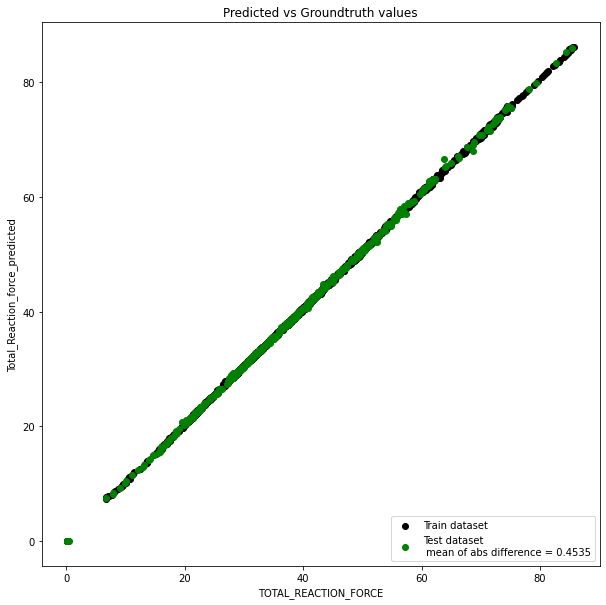

In [ ]:
#plt.scatter(x_train, y_train, color = "red")
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(preds2, trainY, color = "black", label = 'Train dataset')
plt.scatter(preds, testY, color = "green",label = 'Test dataset \n mean of abs difference = 0.5631' )
plt.title("Predicted vs Groundtruth values")
plt.xlabel("TOTAL_REACTION_FORCE")
plt.ylabel("Total_Reaction_force_predicted")
plt.legend(loc = 'lower right');
images_dir = '/content/drive/MyDrive '
plt.savefig(f"{images_dir}/plot of  ppt.png")
plt.show()

In [ ]:
filename = '/content/drive/MyDrive/CNN Weights/Weight file'
model.save_weights(filename, overwrite = True)